In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/averagerevisit3.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','DemandDaily','2monthurea']]
sec1 = sec1.dropna()
print(sec1.shape)
sec1new = np.array(sec1)
sec1new = pd.DataFrame(sec1new)
sec1new.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','DemandDaily','2monthurea']
sec1new

(978, 6)


,latedate,Spotdollar,2monthcrude,2monthcorn,DemandDaily,2monthurea
0,3/1/2012,78.789,109.27,654,1365.48,406
1,3/2/2012,79.403,107.17,655,1579.22,411
2,3/5/2012,79.3,107.18,660.75,8384.19,409
3,3/6/2012,79.866,105.21,654,2046.69,425
4,3/7/2012,79.712,106.65,638.75,1709.89,430
5,3/8/2012,79.139,107.06,635.5,5355.46,430
6,3/9/2012,80.041,107.87,645,1552.01,429
7,3/12/2012,79.89,106.84,659.5,2162.71,433
8,3/13/2012,80.193,107.24,662,2097.59,431
9,3/14/2012,80.565,105.95,658.75,1982.56,430


In [72]:
sec1.describe()

,Spotdollar,2monthcrude,2monthcorn,DemandDaily,2monthurea
count,978.000000,978.000000,978.000000,978.000000,978.000000
mean,85.813207,81.496329,502.216513,6572.021709,335.984663
std,7.067888,23.377449,139.773911,6613.439011,68.153019
min,78.709000,28.350000,333.500000,0.750000,188.000000
25%,80.292750,58.387500,383.812500,2398.538525,286.000000
50%,82.263500,92.740000,449.250000,4567.025600,320.000000
75%,94.245000,98.745000,619.687500,8312.973175,403.750000
max,100.330000,109.520000,838.750000,60022.976800,525.000000


In [73]:
sec1new.dtypes #will need to put latedate in datetime64

latedate       object
Spotdollar     object
2monthcrude    object
2monthcorn     object
DemandDaily    object
2monthurea     object
dtype: object

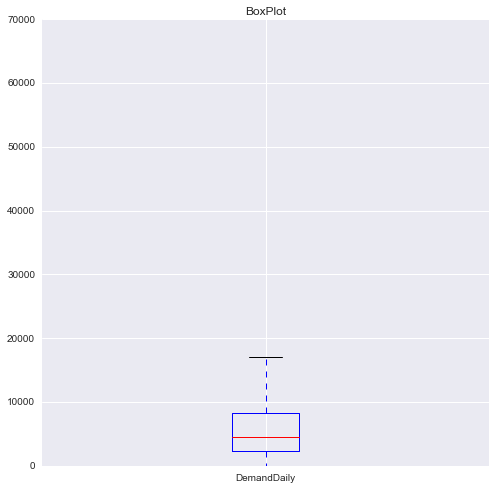

In [74]:
plt.show(sec1new['DemandDaily'].plot(kind='box',figsize=(8,8),title=('BoxPlot')))

In [75]:
sec1.corr()

,Spotdollar,2monthcrude,2monthcorn,DemandDaily,2monthurea
Spotdollar,1.000000,-0.955318,-0.585614,0.183521,-0.703419
2monthcrude,-0.955318,1.000000,0.499145,-0.197660,0.616988
2monthcorn,-0.585614,0.499145,1.000000,-0.099964,0.784117
DemandDaily,0.183521,-0.197660,-0.099964,1.000000,-0.138755
2monthurea,-0.703419,0.616988,0.784117,-0.138755,1.000000


In [16]:
np.corrcoef(sec1['DemandDaily'],sec1['2monthurea'],'full')

array([[ 1.        , -0.13875538],
       [-0.13875538,  1.        ]])

In [12]:
ycorr = scipy.correlate(sec1['2monthurea'].values, template mode='full')
xcorr = np.arange(ycorr.size)

SyntaxError: invalid syntax (<ipython-input-12-f6bcf2c448ba>, line 1)

In [13]:
xcorr = lambda x,y : irfft(rfft(x)*rfft(y[::-1]))
x = sec1new['DemandDaily']
y = sec1new['2monthurea']
print (xcorr(x,y))

NameError: name 'irfft' is not defined

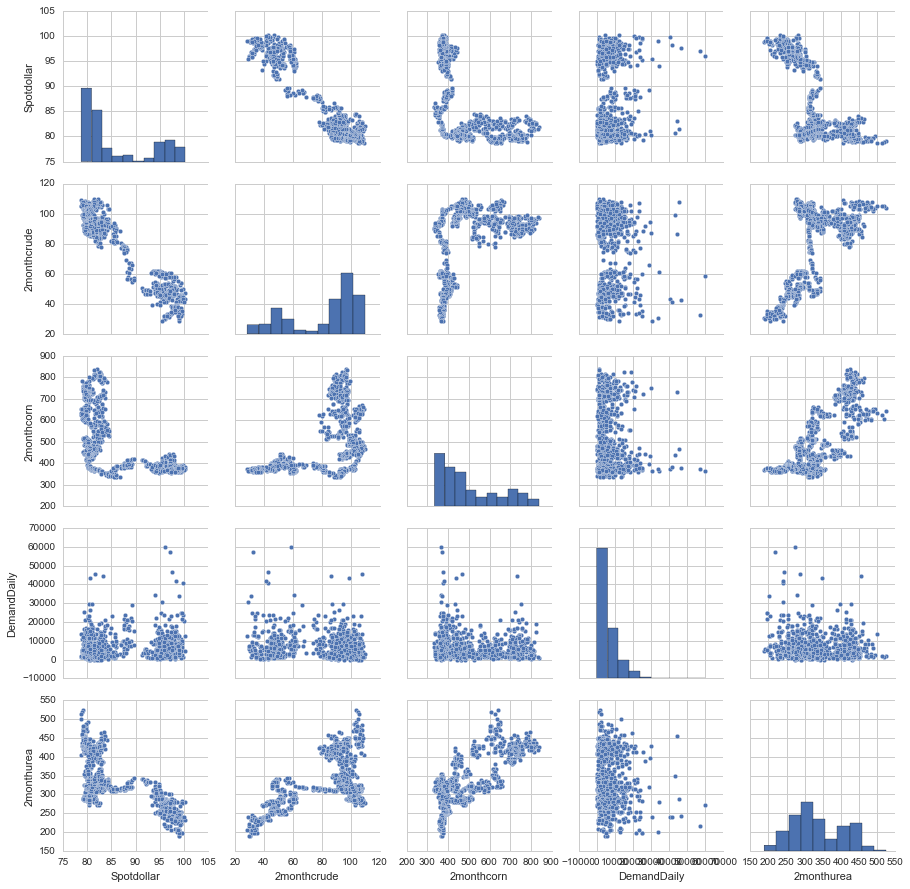

In [21]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(sec1, size=2.5);
plt.show()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


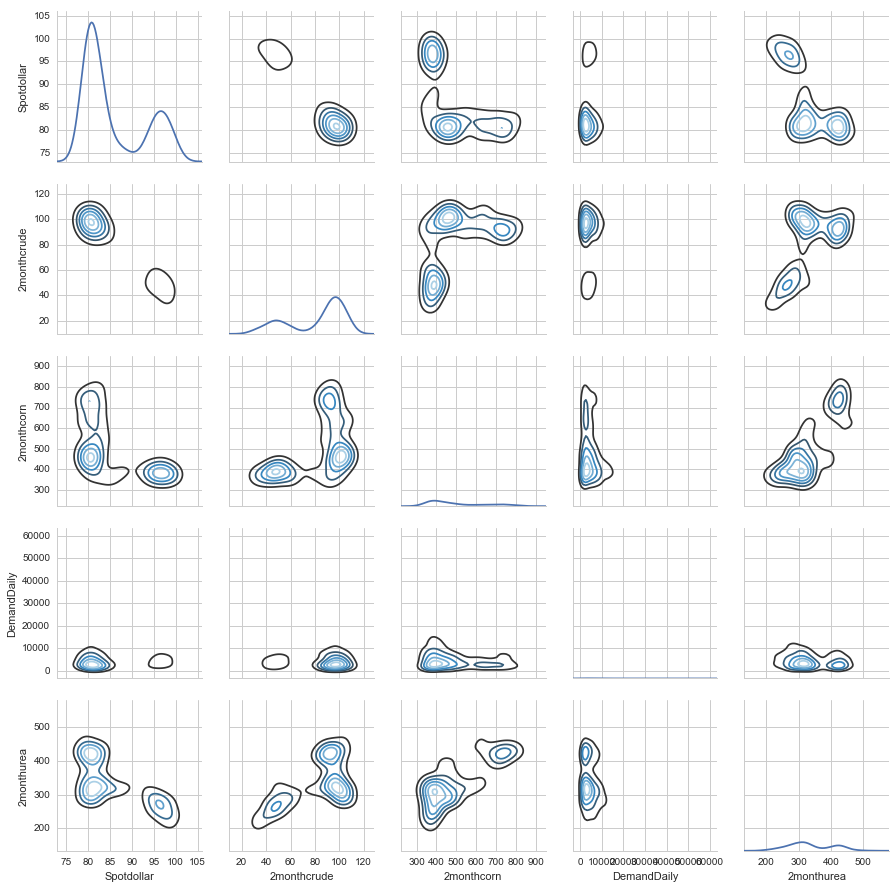

In [22]:
g = sns.PairGrid(sec1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [18]:
from datetime import datetime
sec1new['latedate'] = pd.to_datetime(sec1new['latedate'])
date = sec1new['latedate']
sec1new.dtypes

latedate       datetime64[ns]
Spotdollar             object
2monthcrude            object
2monthcorn             object
DemandDaily            object
2monthurea             object
dtype: object

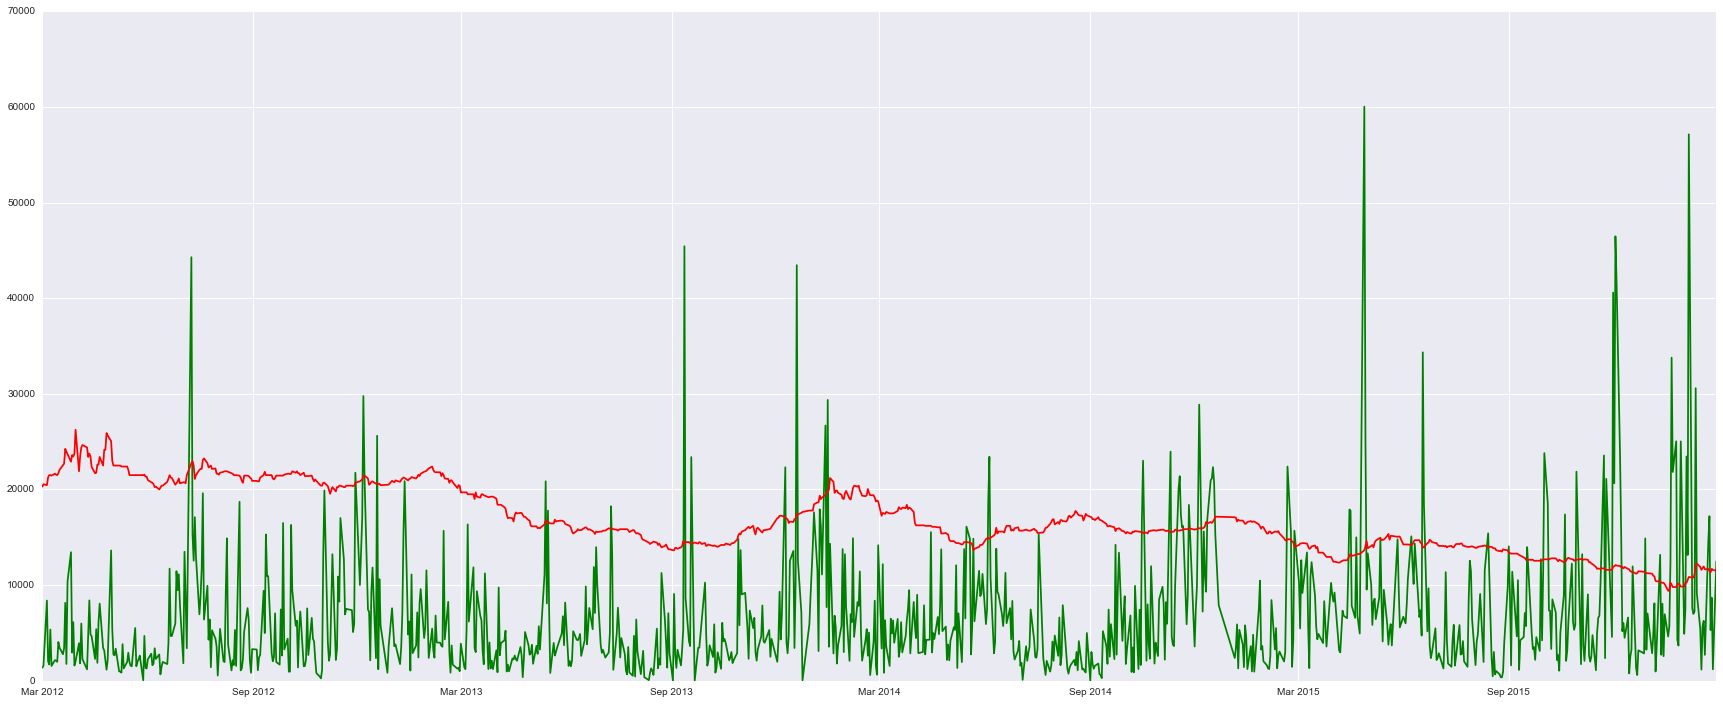

In [19]:
x = date
y1 = (sec1new['DemandDaily'])
y2 = (sec1new['2monthurea'])*50

plt.figure(figsize=(30,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.show()

In [76]:
secmonth = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','DemandMonth','2monthurea']]
secmonth = secmonth.dropna()
print(secmonth.shape)
secmonthnew = np.array(secmonth)
secmonthnew = pd.DataFrame(secmonthnew)
secmonthnew.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','DemandMonth','2monthurea']
secmonthnew

(987, 6)


,latedate,Spotdollar,2monthcrude,2monthcorn,DemandMonth,2monthurea
0,3/1/2012,78.789,109.27,654,154328,406
1,3/2/2012,79.403,107.17,655,154328,411
2,3/5/2012,79.3,107.18,660.75,154328,409
3,3/6/2012,79.866,105.21,654,154328,425
4,3/7/2012,79.712,106.65,638.75,154328,430
5,3/8/2012,79.139,107.06,635.5,154328,430
6,3/9/2012,80.041,107.87,645,154328,429
7,3/12/2012,79.89,106.84,659.5,154328,433
8,3/13/2012,80.193,107.24,662,154328,431
9,3/14/2012,80.565,105.95,658.75,154328,430


In [77]:
secmonth.describe()

,Spotdollar,2monthcrude,2monthcorn,DemandMonth,2monthurea
count,987.000000,987.000000,987.000000,987.000000,987.000000
mean,85.786533,81.519889,503.136525,185985.185649,336.327254
std,7.060138,23.324067,140.282369,67211.134036,68.213670
min,78.709000,28.350000,333.500000,81572.534600,188.000000
25%,80.298500,58.570000,384.125000,130037.257900,286.000000
50%,82.253000,92.630000,450.000000,176061.755500,320.000000
75%,94.217000,98.665000,620.500000,239758.515300,405.000000
max,100.330000,109.520000,838.750000,327148.920700,525.000000


In [78]:
secmonth.corr()

,Spotdollar,2monthcrude,2monthcorn,DemandMonth,2monthurea
Spotdollar,1.000000,-0.955011,-0.585505,0.331018,-0.704134
2monthcrude,-0.955011,1.000000,0.498263,-0.375779,0.617059
2monthcorn,-0.585505,0.498263,1.000000,-0.180069,0.785127
DemandMonth,0.331018,-0.375779,-0.180069,1.000000,-0.285806
2monthurea,-0.704134,0.617059,0.785127,-0.285806,1.000000


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


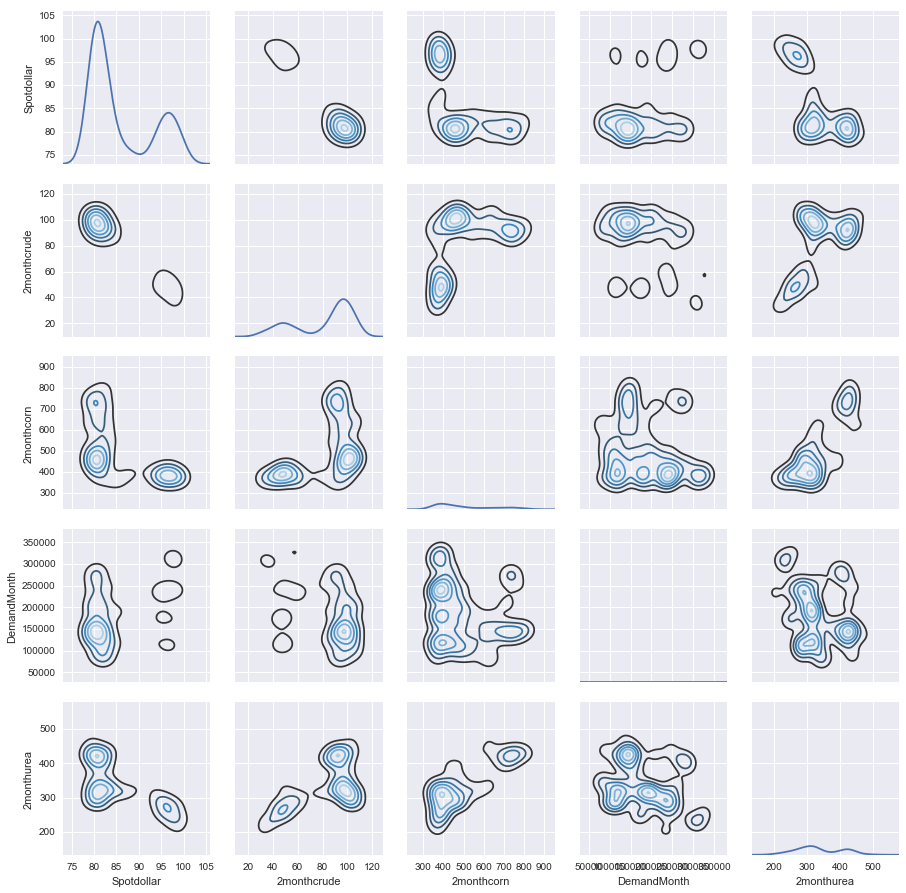

In [21]:
g = sns.PairGrid(secmonth)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [22]:
from datetime import datetime
secmonthnew['latedate'] = pd.to_datetime(secmonthnew['latedate'])
datemonth = secmonthnew['latedate']
secmonthnew.dtypes

latedate       datetime64[ns]
Spotdollar             object
2monthcrude            object
2monthcorn             object
DemandMonth            object
2monthurea             object
dtype: object

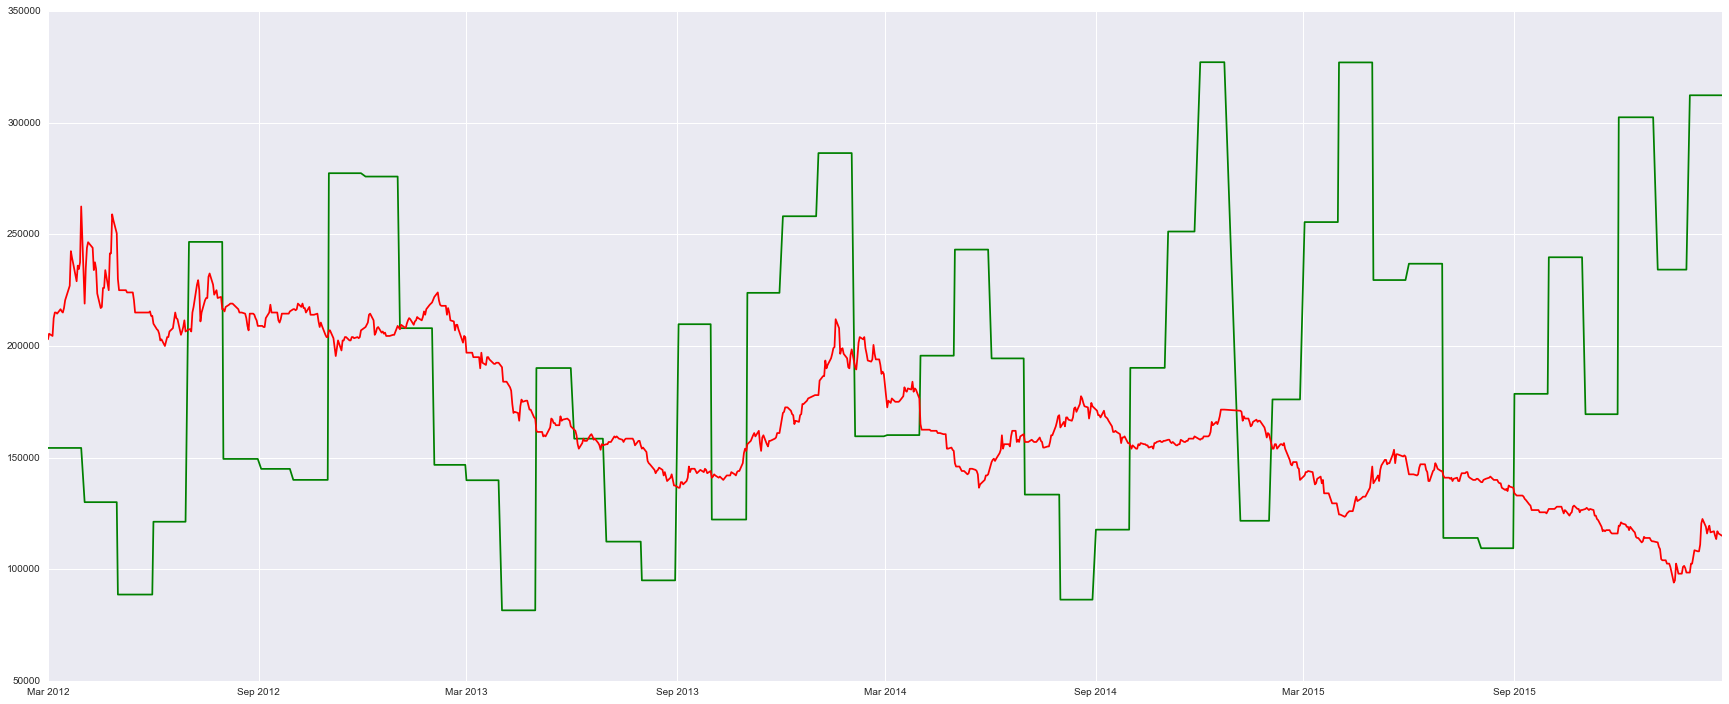

In [23]:
x = datemonth
y1 = (secmonthnew['DemandMonth'])
y2 = (secmonthnew['2monthurea'])*500

plt.figure(figsize=(30,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')

plt.show()

In [24]:
may_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][0:22]
jun_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][22:42]
jul_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][42:65]
aug_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][65:86]
sep_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][86:108]
oct_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][108:131]
nov_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][131:151]
dec_12 = secmonthnew[['latedate','2monthurea','DemandMonth']][151:174]
jan_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][174:194]
feb_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][194:212]
mar_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][212:232]
apr_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][232:251]
may_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][251:271]
jun_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][271:293]
jul_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][293:315]
aug_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][315:335]
sep_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][335:357]
oct_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][357:378]
nov_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][378:398]
dec_13 = secmonthnew[['latedate','2monthurea','DemandMonth']][398:421]
jan_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][421:440]
feb_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][440:459]
mar_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][459:481]
apr_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][481:501]
may_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][501:522]
jun_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][522:544]
jul_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][544:565]
aug_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][565:586]
sep_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][586:609]
oct_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][609:630]
nov_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][630:652]
dec_14 = secmonthnew[['latedate','2monthurea','DemandMonth']][652:675]
jan_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][675:693]
feb_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][693:709]
mar_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][709:728]
apr_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][728:746]
may_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][746:764]
jun_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][764:783]
jul_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][783:802]
aug_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][802:822]
sep_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][822:844]
oct_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][844:862]
nov_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][862:883]
dec_15 = secmonthnew[['latedate','2monthurea','DemandMonth']][883:905]
jan_16 = secmonthnew[['latedate','2monthurea','DemandMonth']][905:924]
feb_16 = secmonthnew[['latedate','2monthurea','DemandMonth']][924:946]
mar_16 = secmonthnew[['latedate','2monthurea','DemandMonth']][946:966]
apr_16 = secmonthnew[['latedate','2monthurea','DemandMonth']][966:987]

In [25]:
demand_monthly = np.array([may_12['DemandMonth'].mean(),jun_12['DemandMonth'].mean(),
                               jul_12['DemandMonth'].mean(),aug_12['DemandMonth'].mean(),
                               sep_12['DemandMonth'].mean(),oct_12['DemandMonth'].mean(),
                               nov_12['DemandMonth'].mean(),dec_12['DemandMonth'].mean(),
                               jan_13['DemandMonth'].mean(),feb_13['DemandMonth'].mean(),
                               mar_13['DemandMonth'].mean(),apr_13['DemandMonth'].mean(),
                               may_13['DemandMonth'].mean(),jun_13['DemandMonth'].mean(),
                               jul_13['DemandMonth'].mean(),aug_13['DemandMonth'].mean(),
                               sep_13['DemandMonth'].mean(),oct_13['DemandMonth'].mean(),
                               nov_13['DemandMonth'].mean(),dec_13['DemandMonth'].mean(),
                               jan_14['DemandMonth'].mean(),feb_14['DemandMonth'].mean(),
                               mar_14['DemandMonth'].mean(),apr_14['DemandMonth'].mean(),
                               may_14['DemandMonth'].mean(),jun_14['DemandMonth'].mean(),
                               jul_14['DemandMonth'].mean(),aug_14['DemandMonth'].mean(),
                               sep_14['DemandMonth'].mean(),oct_14['DemandMonth'].mean(),
                               nov_14['DemandMonth'].mean(),dec_14['DemandMonth'].mean(),
                               jan_15['DemandMonth'].mean(),feb_15['DemandMonth'].mean(),
                               mar_15['DemandMonth'].mean(),apr_15['DemandMonth'].mean(),
                               may_15['DemandMonth'].mean(),jun_15['DemandMonth'].mean(),
                               jul_15['DemandMonth'].mean(),aug_15['DemandMonth'].mean(),
                               sep_15['DemandMonth'].mean(),oct_15['DemandMonth'].mean(),
                               nov_15['DemandMonth'].mean(),dec_15['DemandMonth'].mean(),
                               jan_16['DemandMonth'].mean(),feb_16['DemandMonth'].mean(),
                               mar_16['DemandMonth'].mean(),apr_16['DemandMonth'].mean()])
demand_monthly

array([ 154328.3033,  130037.2579,   88646.1658,  121266.6055,
        246642.7095,  149408.9473,  144944.4253,  140020.0296,
        277421.0173,  275918.1913,  207985.3593,  146748.0672,
        139853.9325,   81572.5346,  190129.5315,  158483.1609,
        112356.8216,   94997.2469,  209765.9935,  122250.3004,
        223817.4154,  258132.8694,  286436.5011,  159546.9949,
        160087.5454,  195666.8522,  243198.3022,  194440.3443,
        133426.0107,   86359.358 ,  117717.5422,  190208.5006,
        251290.8601,  327148.9207,  121690.942 ,  176061.7555,
        255518.1911,  327052.5217,  229547.9184,  236866.0155,
        113996.3228,  109401.865 ,  178566.2503,  239758.5153,
        169438.8895,  302469.9714,  234219.1985,  312332.2873])

In [26]:
actual_monthly_avg = np.array([may_12['2monthurea'].mean(),jun_12['2monthurea'].mean(),
                               jul_12['2monthurea'].mean(),aug_12['2monthurea'].mean(),
                               sep_12['2monthurea'].mean(),oct_12['2monthurea'].mean(),
                               nov_12['2monthurea'].mean(),dec_12['2monthurea'].mean(),
                               jan_13['2monthurea'].mean(),feb_13['2monthurea'].mean(),
                               mar_13['2monthurea'].mean(),apr_13['2monthurea'].mean(),
                               may_13['2monthurea'].mean(),jun_13['2monthurea'].mean(),
                               jul_13['2monthurea'].mean(),aug_13['2monthurea'].mean(),
                               sep_13['2monthurea'].mean(),oct_13['2monthurea'].mean(),
                               nov_13['2monthurea'].mean(),dec_13['2monthurea'].mean(),
                               jan_14['2monthurea'].mean(),feb_14['2monthurea'].mean(),
                               mar_14['2monthurea'].mean(),apr_14['2monthurea'].mean(),
                               may_14['2monthurea'].mean(),jun_14['2monthurea'].mean(),
                               jul_14['2monthurea'].mean(),aug_14['2monthurea'].mean(),
                               sep_14['2monthurea'].mean(),oct_14['2monthurea'].mean(),
                               nov_14['2monthurea'].mean(),dec_14['2monthurea'].mean(),
                               jan_15['2monthurea'].mean(),feb_15['2monthurea'].mean(),
                               mar_15['2monthurea'].mean(),apr_15['2monthurea'].mean(),
                               may_15['2monthurea'].mean(),jun_15['2monthurea'].mean(),
                               jul_15['2monthurea'].mean(),aug_15['2monthurea'].mean(),
                               sep_15['2monthurea'].mean(),oct_15['2monthurea'].mean(),
                               nov_15['2monthurea'].mean(),dec_15['2monthurea'].mean(),
                               jan_16['2monthurea'].mean(),feb_16['2monthurea'].mean(),
                               mar_16['2monthurea'].mean(),apr_16['2monthurea'].mean()])
actual_monthly_avg

array([ 447.77272727,  471.25      ,  439.04347826,  414.19047619,
        440.77272727,  429.65217391,  426.3       ,  426.95652174,
        406.1       ,  415.38888889,  425.6       ,  426.42105263,
        388.3       ,  351.45454545,  328.27272727,  315.55      ,
        315.5       ,  289.04761905,  284.45      ,  287.39130435,
        316.94736842,  343.10526316,  389.09090909,  390.35      ,
        355.33333333,  320.13636364,  286.57142857,  310.71428571,
        317.52173913,  340.9047619 ,  328.        ,  311.65217391,
        314.61111111,  326.8125    ,  330.89473684,  302.33333333,
        275.61111111,  260.26315789,  294.68421053,  287.65      ,
        282.13636364,  276.77777778,  257.57142857,  253.36363636,
        242.94736842,  232.36363636,  204.15      ,  225.71428571])

In [27]:
from datetime import datetime
actual_monthly_avg = pd.DataFrame(actual_monthly_avg)
demand_monthly = pd.DataFrame(demand_monthly)
monthly_date = ['5/2012','6/2012','7/2012','8/2012','9/2012','10/2012','11/2012','12/2012',
                         '1/2013','2/2013','3/2013','4/2013','5/2013','6/2013','7/2013','8/2013',
                         '9/2013','10/2013','11/2013','12/2013','1/2014','2/2014','3/2014','4/2014',
                         '5/2014','6/2014','7/2014','8/2014','9/2014','10/2014','11/2014','12/2014',
                         '1/2015','2/2015','3/2015','4/2015','5/2015','6/2015','7/2015','8/2015',
                         '9/2015','10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016']
monthly_date = pd.to_datetime(monthly_date)
monthly_date.strftime('%b-%y')
monthly_date = pd.DataFrame(monthly_date)
monthly_date.columns = ['Monthly_Date']

In [42]:
monthly_date['Actual_Monthly_Avg'] = actual_monthly_avg
monthly_date['DemandMonth'] = demand_monthly
monthly_avg = monthly_date
print(monthly_avg.dtypes)
monthly_avg
monthly_avg.to_csv("C://Users/msteinme/Documents/demand.csv")

Monthly_Date          datetime64[ns]
Actual_Monthly_Avg           float64
DemandMonth                  float64
dtype: object


KeyError: ('0:1', '4:5')

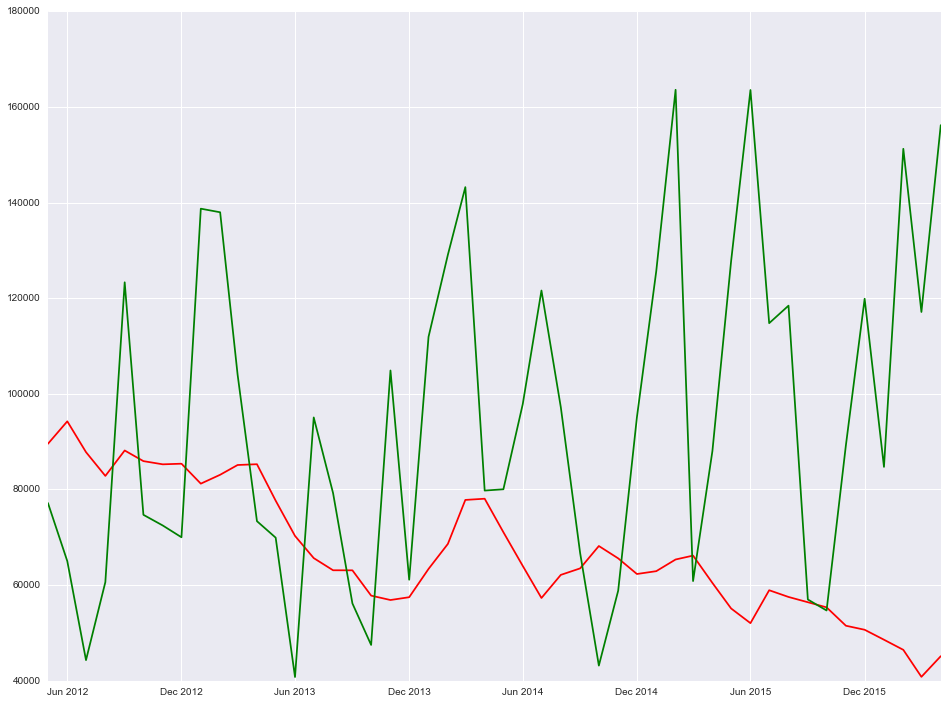

In [37]:
x = (monthly_avg['Monthly_Date'])
y1 = (monthly_avg['Actual_Monthly_Avg'])*200
y2 = (monthly_avg['DemandMonth'])*.5

plt.figure(figsize=(16,12))
plt.plot(x,y1,'r')
plt.plot(x,y2,'g')

plt.show()